In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prettytable import PrettyTable

In [19]:
df = pd.read_excel('FinalOnly.xlsx')
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns.")
print(df.head())

Dataset has 124 rows and 6 columns.
   ID  Quiz1  Quiz2  Quiz3  FinalExamMark  FinalExamStatus
0   1     46     34     64           65.0                1
1   2     40     46     44           60.5                1
2   3     62     36     60           49.0                0
3   4     76     40     38           88.0                1
4   5     56     78     72           66.0                1


In [20]:
df.drop(columns=["ID", "FinalExamStatus"], inplace=True)
print(df.head())

   Quiz1  Quiz2  Quiz3  FinalExamMark
0     46     34     64           65.0
1     40     46     44           60.5
2     62     36     60           49.0
3     76     40     38           88.0
4     56     78     72           66.0


In [21]:
print(df.describe())

            Quiz1       Quiz2       Quiz3  FinalExamMark
count  124.000000  124.000000  124.000000      124.00000
mean    62.290323   40.854839   44.387097       65.62500
std     14.095363   12.225984   13.580659       10.97792
min     24.000000   14.000000    6.000000       21.00000
25%     54.000000   33.500000   37.000000       58.00000
50%     64.000000   40.000000   44.000000       66.00000
75%     74.000000   48.500000   56.000000       72.25000
max     88.000000   78.000000   82.000000       91.00000


In [22]:
X = df[['Quiz1', 'Quiz2', 'Quiz3']].values
y = df['FinalExamMark'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Initialize models and hyperparameters
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': GridSearchCV(Ridge(), {'alpha': [0.01, 0.1, 1, 10, 100]}, cv=5),
    'Lasso': GridSearchCV(Lasso(), {'alpha': [0.01, 0.1, 1, 10, 100]}, cv=5),
    'SVR Linear': GridSearchCV(SVR(kernel='linear'), {'C': [0.1, 1, 10]}, cv=5),
    'SVR RBF': GridSearchCV(SVR(kernel='rbf'), {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'auto', 'scale']}, cv=5),
    'Decision Tree': GridSearchCV(DecisionTreeRegressor(), {'max_depth': [None, 10, 20, 30]}, cv=5),
    'Random Forest': GridSearchCV(RandomForestRegressor(), {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}, cv=5),
    'Gradient Boosting': GridSearchCV(GradientBoostingRegressor(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.05, 0.1]}, cv=5),
    'MLP': GridSearchCV(
      MLPRegressor(max_iter=5000, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10),
      {
          'hidden_layer_sizes': [(100,), (50,50)],
          'activation': ['relu', 'tanh'],
          'learning_rate_init': [0.01, 0.001, 0.0001]          
      },
      cv=5
)

}

predictions = {}

for name, model in models.items():
    # Training
    model.fit(X_train, y_train)

    # Storing predictions
    if hasattr(model, "best_estimator_"):
        predictions[name] = model.best_estimator_.predict(X_test)
        print(f"Best parameters for {name}: {model.best_params_}")
    else:
        predictions[name] = model.predict(X_test)

Best parameters for Ridge: {'alpha': 100}
Best parameters for Lasso: {'alpha': 1}
Best parameters for SVR Linear: {'C': 0.1}
Best parameters for SVR RBF: {'C': 1, 'gamma': 'scale'}
Best parameters for Decision Tree: {'max_depth': 10}
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 50}
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'n_estimators': 100}


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multil

Best parameters for MLP: {'activation': 'relu', 'hidden_layer_sizes': (50, 50), 'learning_rate_init': 0.01}


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [24]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

results = {'Model': [], 'MAE': [], 'MAPE': [], 'MSE': [], 'RMSE': []}

for name, y_pred in predictions.items():
    results['Model'].append(name)
    results['MAE'].append(round(mean_absolute_error(y_test, y_pred), 2))
    results['MAPE'].append(round(mean_absolute_percentage_error(y_test, y_pred), 2))
    results['MSE'].append(round(mean_squared_error(y_test, y_pred), 2))
    results['RMSE'].append(round(np.sqrt(mean_squared_error(y_test, y_pred)), 2))

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Sort the DataFrame in ascending order of RMSE
final_results_df = results_df.sort_values(by='RMSE', ascending=True)

# Display in a table
print(final_results_df.to_markdown(index=False))

| Model             |   MAE |   MAPE |    MSE |   RMSE |
|:------------------|------:|-------:|-------:|-------:|
| Decision Tree     |  7.62 |  11.94 |  93.34 |   9.66 |
| Gradient Boosting |  7.18 |  12.79 |  95.49 |   9.77 |
| SVR RBF           |  7.36 |  13.04 |  95.74 |   9.78 |
| SVR Linear        |  7.29 |  13.15 |  98.08 |   9.9  |
| Lasso             |  7.23 |  13.19 | 103.27 |  10.16 |
| Linear Regression |  7.25 |  13.22 | 103.91 |  10.19 |
| Ridge             |  7.24 |  13.21 | 103.8  |  10.19 |
| Random Forest     |  7.93 |  13.7  | 104.23 |  10.21 |
| MLP               | 10.5  |  18.12 | 164.62 |  12.83 |


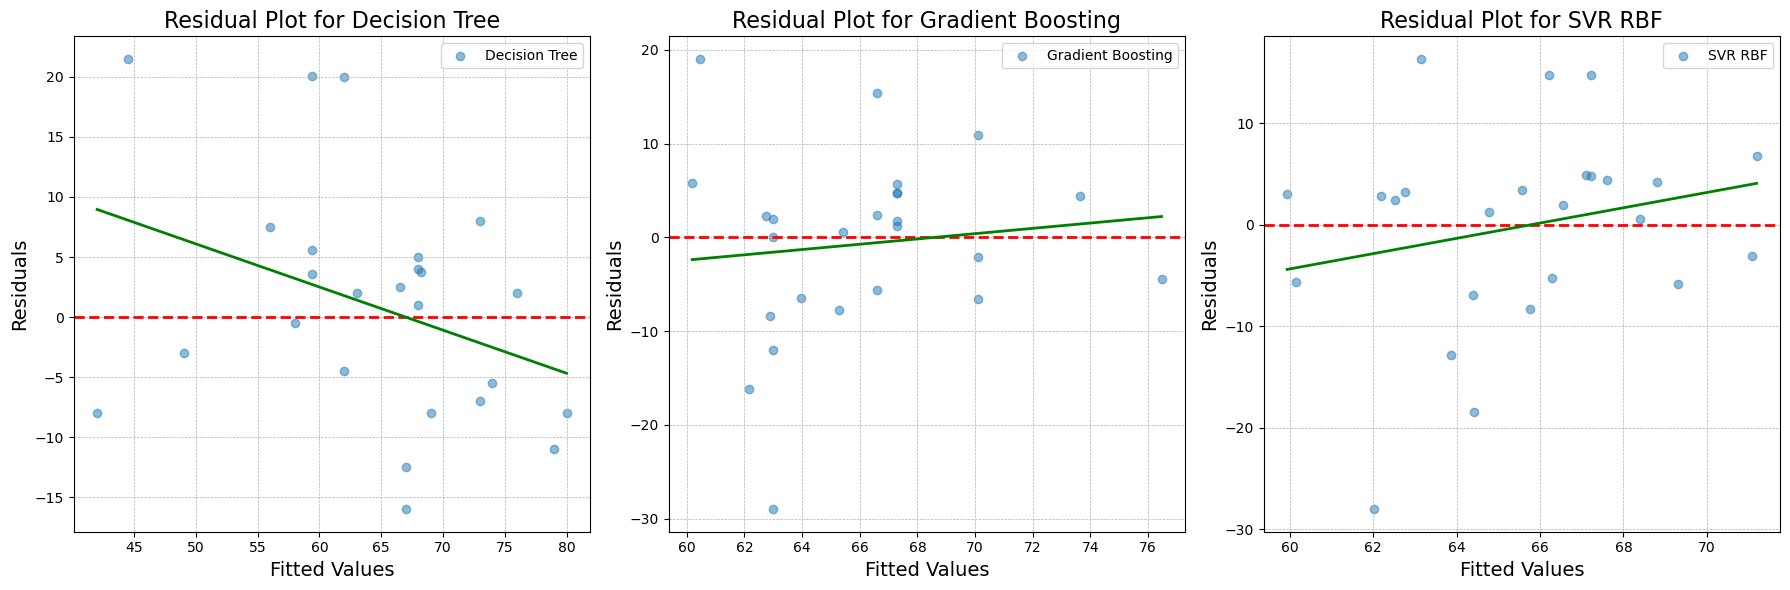

In [25]:
# Models to include in the plot
models_to_plot = ['Decision Tree', 'Gradient Boosting', 'SVR RBF']

# Colors for the zero line and best-fitted line
zero_line_color = 'red'
best_fitted_line_color = 'green'

# Create a single figure with three subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, name in enumerate(models_to_plot):
    y_pred = predictions.get(name)
    residuals = y_test - y_pred

    # Calculate the best-fitted line for the current model
    sorted_indices = np.argsort(y_pred)
    sorted_y_pred = np.array(y_pred)[sorted_indices]
    sorted_residuals = np.array(residuals)[sorted_indices]

    slope, intercept = np.polyfit(sorted_y_pred, sorted_residuals, 1)
    best_fit_line = slope * sorted_y_pred + intercept

    # Scatter plot of residuals on the current subplot
    axes[i].scatter(y_pred, residuals, alpha=0.5, label=name)

    # Plot the zero line in red
    axes[i].axhline(0, color=zero_line_color, linestyle='--', linewidth=2)

    # Plot the best-fitted line with the chosen color
    axes[i].plot(sorted_y_pred, best_fit_line, color=best_fitted_line_color, linestyle='-', linewidth=2)

    axes[i].set_xlabel('Fitted Values', fontsize=14)
    axes[i].set_ylabel('Residuals', fontsize=14)
    axes[i].set_title(f'Residual Plot for {name}', fontsize=16)
    axes[i].grid(True, linestyle='--', linewidth=0.5)
    axes[i].legend()

plt.tight_layout()
plt.show()